In [25]:
import pandas as pd

data = pd.read_csv("student-por.csv")

data.loc[data['G3'] >= 10, 'Result'] = 'Pass' 
data.loc[data['G3'] < 10, 'Result'] =  'Fail'

data.to_csv("student-por-result.csv", index=False)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier

le = LabelEncoder()

df = pd.read_csv('student-por-result.csv')

features = ['school', 'Mjob', 'higher', 'failures', 'G1']
label = ['Result']

X = df[features]
y = df[label]

X = X.apply(le.fit_transform)
y = y.apply(le.fit_transform)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


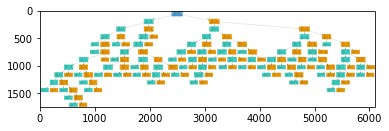

In [37]:
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import collections

# clf
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

data = tree.export_graphviz(dtree, out_file=None, feature_names=features, filled=True,)
graph = pydotplus.graph_from_dot_data(data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Result
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,Pass
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,Pass
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,Fail
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,Pass
